# RRONTO dataset Visualization


## Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/Colab\ Notebooks/summer_coop/pronto/PRONTO_benchmark_case_study

/content/drive/My Drive/Colab Notebooks/summer_coop/pronto/PRONTO_benchmark_case_study


In [ ]:
ls

'C0 Normal and Slugging conditions'/  'Operation logs'/
'C1 Air Blockage'/                     Photos/
'C2 Air Leakage'/                     'Pre-processed data'/
'C3 Diverted flow'/                    README.txt
'Extra data'/                         'Technical documents'/


## Get Alarm data
- only contains alarm and event data(not process data)
- not used for the project, just check
- tsv format

In [ ]:
import pandas as pd
alarm_df = pd.read_csv('C0 Normal and Slugging conditions/Test9/Alarms and Events/0912Testday4_AlmEvt.txt', sep = '\t')

In [ ]:
alarm_df.head()

,Unnamed: 0,Date/Time*,Event Type,Category,Area,Node,Unit,Module,Module Description,Parameter,State,Level,Desc1,Desc2
0,1,9/12/2017 1:49:54.097 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,INACT/UNACK,15-CRITICAL,MODBAD,Module Error: 0 or Module Status: 0
1,2,9/12/2017 1:49:53.097 PM,EVENT,PROCESS,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),NaN,ACTIVE,4-INFO,Error Cleared,Module Failure Active
2,3,9/12/2017 1:49:53.097 PM,EVENT,PROCESS,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),NaN,ACTIVE,4-INFO,Error Cleared,I/O Input Failure
3,4,9/12/2017 1:49:50.097 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,ACT/UNACK,15-CRITICAL,MODBAD,Module Error: 264 or Module Status: 0
4,5,9/12/2017 1:49:49.096 PM,EVENT,PROCESS,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),NaN,ACTIVE,4-INFO,LI405/AI2,Module Failure Active


In [ ]:
alarm_tf = alarm_df['Event Type'] == 'ALARM'
alarm_only = alarm_df[alarm_tf]

In [ ]:
alarm_only.head()

,Unnamed: 0,Date/Time*,Event Type,Category,Area,Node,Unit,Module,Module Description,Parameter,State,Level,Desc1,Desc2
0,1,9/12/2017 1:49:54.097 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,INACT/UNACK,15-CRITICAL,MODBAD,Module Error: 0 or Module Status: 0
3,4,9/12/2017 1:49:50.097 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,ACT/UNACK,15-CRITICAL,MODBAD,Module Error: 264 or Module Status: 0
10,11,9/12/2017 1:47:32.098 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,INACT/UNACK,15-CRITICAL,MODBAD,Module Error: 0 or Module Status: 0
13,14,9/12/2017 1:47:28.098 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,ACT/UNACK,15-CRITICAL,MODBAD,Module Error: 264 or Module Status: 0
16,17,9/12/2017 1:47:23.098 PM,ALARM,INSTRUMENT,TEST_SECTION,NODE1,NaN,LI405,Air/Liquid level (Radar),MODULE_ALM,INACT/UNACK,15-CRITICAL,MODBAD,Module Error: 0 or Module Status: 0


## Check labeled data
- contains labeled data
- not used for the project, just check
- mat format

In [ ]:
from scipy import io
mat_file = io.loadmat('/content/drive/My Drive/Colab Notebooks/summer_coop/pronto/PRONTO_benchmark_case_study/Pre-processed data/Ultrasonic data/10air_1_water_20pc_0709.mat')
type(mat_file)

dict

In [ ]:
for i in mat_file:
    print(i)

__header__
__version__
__globals__
A


In [ ]:
mat_file['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Sep 25 12:04:38 2018'

In [ ]:
mat_file['A']

array([[1.05957 ],
       [0.993652],
       [0.927734],
       ...,
       [2.502441],
       [2.429199],
       [2.341309]])

In [ ]:
mat_file2 = io.loadmat('/content/drive/My Drive/Colab Notebooks/summer_coop/pronto/PRONTO_benchmark_case_study/Pre-processed data/Aligned and labelled alarm and process data/alarm_process_aligned_labelled.mat')
type(mat_file)

/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


dict

In [ ]:
for i in mat_file2:
    print(i)

__header__
__version__
__globals__
None
__function_workspace__


In [ ]:
mat_file2['None']

MatlabOpaque([(b'Day4', b'MCOS', b'table', array([[3707764736],
       [         2],
       [         1],
       [         1],
       [         3],
       [         1]], dtype=uint32))],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

In [ ]:
mat_file2['__function_workspace__']

array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)

## Get pre-processed merged data
- contains alarm and process data
- will be used for the project
- csv format
- has header at the first line
- for more information about the data, refer raw measured data

### Raw measured data
- process data
    - csv format
    - contains time stamp, start time, end time
    - units are mentioned in the technical report


In [ ]:
full_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/summer_coop/pronto/PRONTO_benchmark_case_study/Pre-processed data/Aligned and labelled alarm and process data/Testday2_merged.csv')

In [ ]:
full_df.head()

,FIC301,FIC302,LI405,LI502,PT312,VC303,VC401,VC403,VC404,VC405,VC406,VLV303,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault
0,0,0,1,0,0,0,0,0,0,0,0,0,121.053597,15.68166,1.301107,0.096309,23.748079,997.596497,1.240097,1.025907,1.027175,0.000491,0.064845,1.005916,25.092310,62.243111,98.642677,2.257356,1.443121,Normal
1,0,0,1,0,0,0,0,0,0,0,0,0,120.982101,15.68156,1.298735,0.096320,23.745350,997.596619,1.236252,1.027934,1.027277,0.000483,0.095639,1.006192,25.099390,62.235279,98.644371,2.278575,1.443152,Normal
2,0,0,1,0,0,0,0,0,0,0,0,0,120.864098,15.68147,1.296362,0.096331,23.742620,997.596619,1.240946,1.035563,1.028881,0.000476,0.095639,1.006467,25.106461,62.227440,98.646057,2.299793,1.443183,Normal
3,0,0,1,0,0,0,0,0,0,0,0,0,120.746002,15.68138,1.301659,0.096342,23.739889,997.596680,1.238252,1.030079,1.028640,0.000468,0.076789,1.006743,25.113529,62.219608,98.647758,2.321012,1.443214,Normal
4,0,0,1,0,0,0,0,0,0,0,0,0,120.627998,15.68129,1.299090,0.096354,23.737160,997.596680,1.231918,1.026742,1.028400,0.000461,0.076789,1.006743,25.120600,62.262520,98.649452,2.399387,1.443244,Normal


### check null data
- all column have 12420 datas -> no null data

In [ ]:
full_df.describe()

,FIC301,FIC302,LI405,LI502,PT312,VC303,VC401,VC403,VC404,VC405,VC406,VLV303,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level
count,12420.000000,12420.000000,12420.000000,12420.0,12420.000000,12420.0,12420.0,12420.0,12420.0,12420.0,12420.0,12420.0,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000,12420.000000
mean,0.028824,0.053462,0.632770,0.0,0.284944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.581923,16.140159,2.017477,0.353547,24.702663,996.701163,1.442994,1.071009,1.014243,2.987650,0.482436,0.992391,21.713319,61.953179,98.591115,5.625045,1.438565
std,0.167320,0.224962,0.482069,0.0,0.451406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.396347,0.756454,1.554571,0.191175,0.915122,0.899292,0.274847,0.089945,0.038052,3.835474,0.442721,0.037520,9.276183,0.876647,0.197241,3.704148,0.010241
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.503433,15.107760,0.607549,0.096309,23.124060,992.594971,0.997974,0.820029,0.845333,0.000000,-4.607517,0.822942,0.030689,52.973598,97.675377,0.000000,1.393454
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.546799,15.709213,1.290035,0.100039,23.596318,996.242966,1.226012,1.012675,1.016378,0.000403,0.075574,0.995216,23.829867,61.841709,98.595945,2.593196,1.439275
50%,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.162201,15.844130,1.686276,0.496417,25.228710,996.358521,1.411673,1.026503,1.020838,0.017576,0.398116,0.998588,25.103866,61.997145,98.661488,7.064692,1.441777
75%,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.974197,16.249293,1.771709,0.498899,25.448669,997.689606,1.474661,1.139814,1.025013,7.104351,0.780510,1.003028,27.337708,62.140586,98.690277,8.093972,1.444006
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.018494,18.962650,7.269874,0.528756,26.674419,997.895325,2.949929,2.423896,1.316939,31.114389,2.146971,1.294650,33.269218,71.911484,99.537453,47.400379,1.448196


In [ ]:
full_df.corr()

,FIC301,FIC302,LI405,LI502,PT312,VC303,VC401,VC403,VC404,VC405,VC406,VLV303,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level
FIC301,1.000000,-0.040944,-0.226144,NaN,-0.108753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084322,-0.070395,-0.039810,0.071565,0.043638,-0.055958,-0.022565,0.112157,0.041343,0.146617,0.101389,0.035726,0.097749,0.007877,0.049667,0.069983,0.065705
FIC302,-0.040944,1.000000,-0.311966,NaN,-0.150025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178328,0.004479,-0.069159,0.179284,0.195380,-0.076563,-0.021683,0.140017,0.029405,0.151760,0.129880,0.018650,0.017147,-0.027798,-0.121472,0.105496,0.055589
LI405,-0.226144,-0.311966,1.000000,NaN,-0.828634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.236522,-0.261498,-0.152225,-0.515954,-0.507952,0.303781,-0.044440,-0.453149,-0.155017,-0.449708,-0.516990,-0.142769,-0.184618,0.077742,-0.090478,-0.432247,-0.057830
LI502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT312,-0.108753,-0.150025,-0.828634,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132462,0.303122,0.211788,0.435128,0.428913,-0.265519,0.066629,0.372579,0.135569,0.350279,0.449801,0.129930,0.152381,-0.072089,0.138751,0.383094,0.009701
VC303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize the data
### time stamp versus values

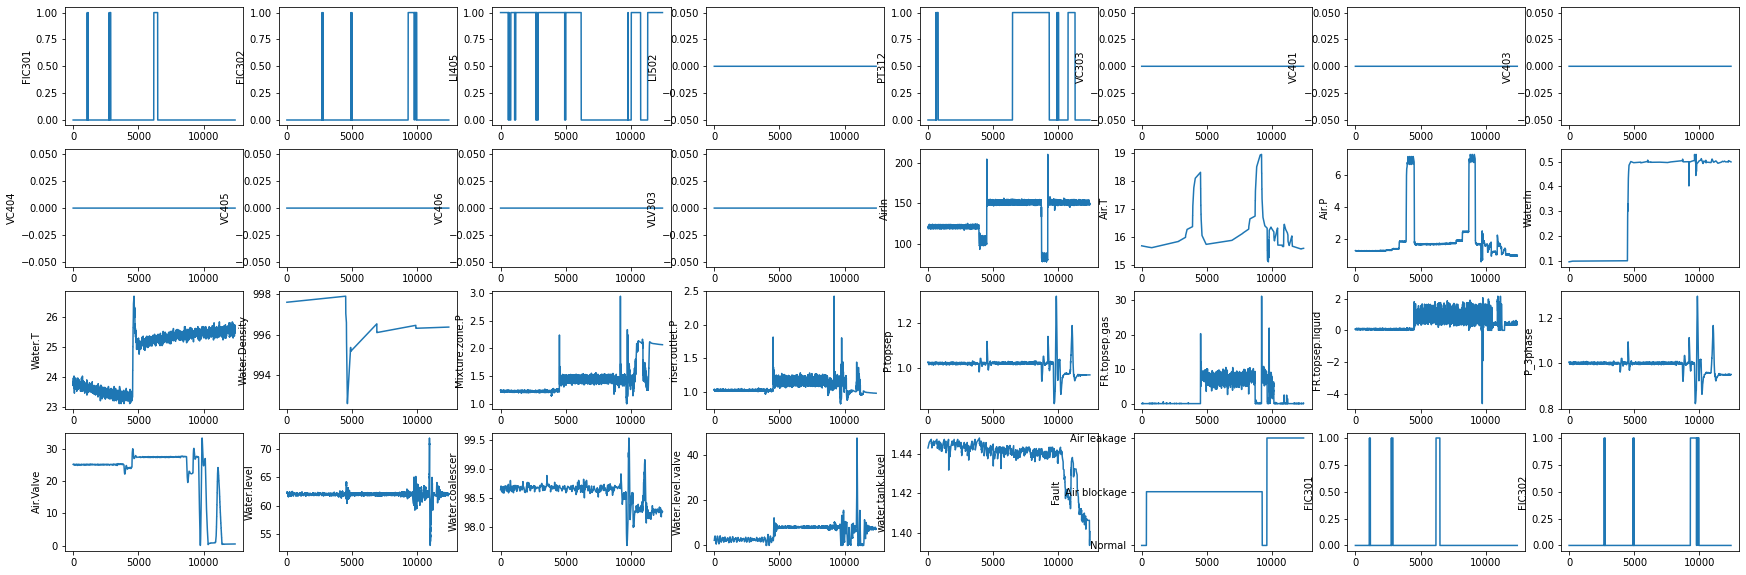

In [ ]:
import matplotlib.pyplot as plt

col_name = full_df.head()

fig, axs = plt.subplots(4, 8, figsize = (30, 10))
i = 0
while(i < 32):
    for index in col_name:
        axs[i//8, i % 8].plot(full_df[index])
        axs[i//8, i % 8].set_ylabel(index)
        i += 1
        if(i == 32):
            break
plt.savefig('/content/drive/My Drive/Colab Notebooks/summer_coop/pronto/PRONTO_benchmark_case_study/Pre-processed data/Aligned and labelled alarm and process data/Testday2_merged.png')
plt.show()

In [ ]:
col_name

,FIC301,FIC302,LI405,LI502,PT312,VC303,VC401,VC403,VC404,VC405,VC406,VLV303,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault
0,0,0,1,0,0,0,0,0,0,0,0,0,121.053597,15.68166,1.301107,0.096309,23.748079,997.596497,1.240097,1.025907,1.027175,0.000491,0.064845,1.005916,25.092310,62.243111,98.642677,2.257356,1.443121,Normal
1,0,0,1,0,0,0,0,0,0,0,0,0,120.982101,15.68156,1.298735,0.096320,23.745350,997.596619,1.236252,1.027934,1.027277,0.000483,0.095639,1.006192,25.099390,62.235279,98.644371,2.278575,1.443152,Normal
2,0,0,1,0,0,0,0,0,0,0,0,0,120.864098,15.68147,1.296362,0.096331,23.742620,997.596619,1.240946,1.035563,1.028881,0.000476,0.095639,1.006467,25.106461,62.227440,98.646057,2.299793,1.443183,Normal
3,0,0,1,0,0,0,0,0,0,0,0,0,120.746002,15.68138,1.301659,0.096342,23.739889,997.596680,1.238252,1.030079,1.028640,0.000468,0.076789,1.006743,25.113529,62.219608,98.647758,2.321012,1.443214,Normal
4,0,0,1,0,0,0,0,0,0,0,0,0,120.627998,15.68129,1.299090,0.096354,23.737160,997.596680,1.231918,1.026742,1.028400,0.000461,0.076789,1.006743,25.120600,62.262520,98.649452,2.399387,1.443244,Normal


### time stamp versus alarm & features in one graph

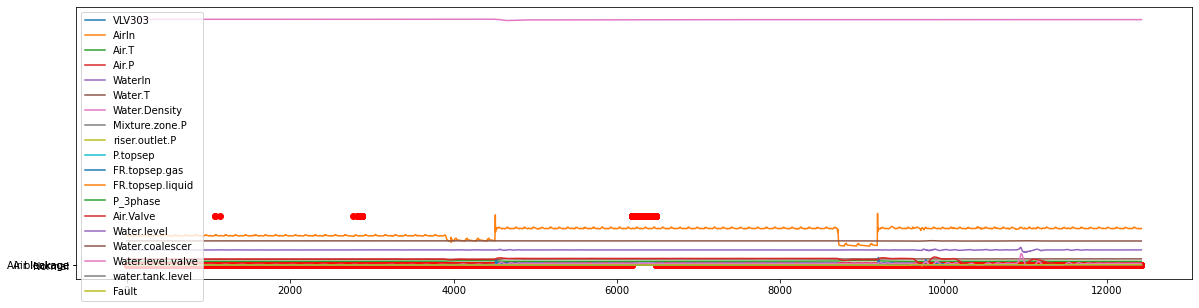

In [ ]:
plt.figure(figsize = (20, 5))
plt.scatter(range(1, len(full_df['FIC301'])+1), full_df['FIC301']*200, color = 'red')
index_name = full_df.columns[11:]

for i in index_name:
    plt.plot(full_df[i])
plt.legend(index_name)
plt.show()

In [ ]:
len(full_df['FIC301'])

12420